In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

### Generate original and transformed grids

In [2]:
# Create a grid of points in x-y space 
xvals = np.linspace(-4, 4, 9)
yvals = np.linspace(-3, 3, 7)

xygrid = np.column_stack([[x, y] for x in xvals for y in yvals])

In [3]:
xygrid.shape

(2, 63)

Here, the x-axis values span from -4 to 4 and the y-axis value span from -3 to 3. By stacking the x-y pairs columnwise, we generate a 2-by-n rectangular grid of points:

In [4]:
# Apply linear transform
a = np.column_stack([[2, 1], [-1, 1]])

print(a)

uvgrid = np.dot(a, xygrid)

print(uvgrid)

[[ 2 -1]
 [ 1  1]]
[[ -5.  -6.  -7.  -8.  -9. -10. -11.  -3.  -4.  -5.  -6.  -7.  -8.  -9.
   -1.  -2.  -3.  -4.  -5.  -6.  -7.   1.   0.  -1.  -2.  -3.  -4.  -5.
    3.   2.   1.   0.  -1.  -2.  -3.   5.   4.   3.   2.   1.   0.  -1.
    7.   6.   5.   4.   3.   2.   1.   9.   8.   7.   6.   5.   4.   3.
   11.  10.   9.   8.   7.   6.   5.]
 [ -7.  -6.  -5.  -4.  -3.  -2.  -1.  -6.  -5.  -4.  -3.  -2.  -1.   0.
   -5.  -4.  -3.  -2.  -1.   0.   1.  -4.  -3.  -2.  -1.   0.   1.   2.
   -3.  -2.  -1.   0.   1.   2.   3.  -2.  -1.   0.   1.   2.   3.   4.
   -1.   0.   1.   2.   3.   4.   5.   0.   1.   2.   3.   4.   5.   6.
    1.   2.   3.   4.   5.   6.   7.]]


### Plot grids

In [5]:
# This function assigns a unique color based on position
def colorizer(x, y):
    """
    Map x-y coordinates to a rgb color
    """
    r = min(1, 1-y/3)
    g = min(1, 1+y/3)
    b = 1/4 + x/16
    
    return (r, g, b)

We map this function to the x-y coordinates to generate an array of rgb color, and then plot the x-y grid points:

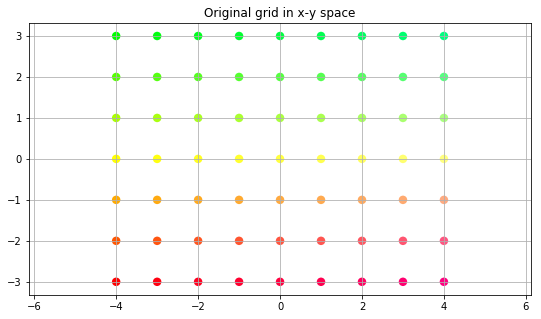

In [6]:
# Map grid coordinates to colors
colors = list(map(colorizer, xygrid[0], xygrid[1]))

# Plot grid points 
plt.figure(figsize=(9, 5), facecolor="w")
plt.scatter(xygrid[0], xygrid[1], s=72, c=colors, edgecolor="none")

# Set axis limits
plt.grid(True)
plt.axis("equal")
plt.title("Original grid in x-y space");

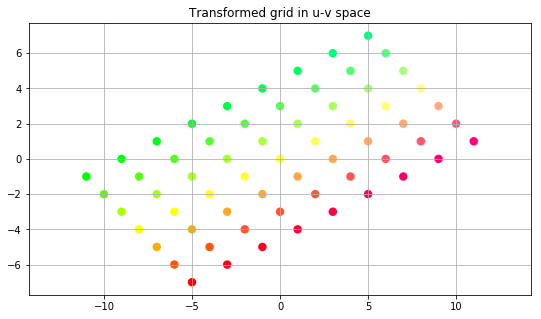

In [7]:
# Plot transformed grid points
plt.figure(figsize=(9, 5), facecolor="w")
plt.scatter(uvgrid[0], uvgrid[1], s=72, c=colors, edgecolor="none")
plt.grid(True)
plt.axis("equal")
plt.title("Transformed grid in u-v space");

### Generate intermediate transforms

To create the animated version, we need a series of intermediate grids that will smoothly transition from the original grid to the transformed grid. 

One way to achieve this is by constructing a series of 2-by-2 matrices that interpolate between the identity matrix 
$ I = 
  \begin{bmatrix}
    1 & 0 \\
    0 & 1 
  \end{bmatrix}$ and the target matrix $ A = 
  \begin{bmatrix}
    2 & -1 \\
    1 & 1 
  \end{bmatrix}$
  

  Supose we want to do this in n steps. Then the jth matrix in this sequence is:     
      $ A_j = I + \frac{j}{n}(A - I) =  
          \begin{bmatrix} 
            1 + \frac{j}{n} & -\frac{j}{n} \\
            \frac{j}{n} & 1 
          \end{bmatrix}
      $ 
 where j = 0 \ldots n j=0 … n. 
 
 The matrix product $ A_j⋅xygrid $ computes grid coordinates for the jth intermediate transform.

In [8]:
# To animate the transform, we generate a series of intermediates
# Function to compute all intermediate transforms
def stepwise_transform(a, points, nsteps=30):
    '''
    Generate a series of intermediate transform for the matrix multiplication
      np.dot(a, points) # matrix multiplication
    starting with the identity matrix, where
      a: 2-by-2 matrix
      points: 2-by-n array of coordinates in x-y space 

    Returns a (nsteps + 1)-by-2-by-n array
    '''
    # create empty array of the right size
    transgrid = np.zeros((nsteps+1,) + np.shape(points))
    
    # compute intermediate transforms
    for j in range(nsteps+1):
        intermediate = np.eye(2) + j/nsteps*(a - np.eye(2)) 
        transgrid[j] = np.dot(intermediate, points) # apply intermediate matrix transformation
        
    return transgrid


In [9]:
# Apply to x-y grid
steps = 30
transform = stepwise_transform(a, xygrid, nsteps=steps)

### Plot intermediate transforms

Next we plot each of the intermediate grids on a common axis. To construct the animated version, we need to save each of these intermediate plots as an image file. The following code block defines a function that generates a series of image files with the filename frame-xx.png and saves them in a subdirectory. We apply this function to the array of intermediate grid coordinates that we generated above:

In [10]:
# Create a series of figures showing the intermediate transforms
def make_plots(transarray, color, outdir="C:\\Users\\user\\Desktop\\png-frames", figuresize=(9,5), figuredpi=150):
    '''
    Generate a series of png images showing a linear transformation stepwise
    '''
    nsteps = transarray.shape[0]
    ndigits = len(str(nsteps)) # to determine filename padding
    maxval = np.abs(transarray.max()) # to set axis limits
    # create directory if necessary
    import os
    if not os.path.exists(outdir):
        os.makedirs(outdir)
    # create figure
    plt.ioff()
    fig = plt.figure(figsize=figuresize, facecolor="w")
    
    for j in range(nsteps): # plot individual frames
        plt.cla()
        plt.scatter(transarray[j,0], transarray[j,1], s=72, c=color, edgecolor="none")
        plt.xlim(1.1*np.array([-maxval, maxval]))
        plt.ylim(1.1*np.array([-maxval, maxval]))
        plt.grid(True)
        plt.draw()
        
      
        # save as png
        outfile = os.path.join(outdir, "frame-" + str(j+1).zfill(ndigits) + ".png")
        print(j, outfile)
        
        fig.savefig(outfile, dpi=figuredpi)
        
    plt.ion()

In [12]:
# Generate figures
make_plots(transform, colors)

PermissionError: [WinError 5] Access is denied: 'C:\\Users\\user'

### Create animation

In [13]:
from subprocess import call

In [14]:
call("cd C:\\Users\\user\\Desktop\\png-frames && convert -delay 10 frame-*.png ../animation.gif", shell=True)

1